In [6]:
import matplotlib.pyplot as plt
import time
import networkit

# CurrentFlowGroupClosenessCentralityTest
## Input Parameters
CurrentFlowGroupCloseness(Graph& G,count k,count CB)

- G: expects a connected undirected network (for unconnected networks use clean_network());
- k: defines Size of the group of nodes
- CB: if equal 0/1 runs simply algorithm without coursing, atherwise sets a Coarsening Bound

# Settings:

In [15]:
reader = networkit.graphio.KONECTGraphReader()
graphDir="/home/gabriel/Projects/networkit-test/assets/";

In [35]:
listGraphs = []
listResults = []

listGraphs.append(("example_1","example_1.txt"))
listGraphs.append(("example_2","example_2.txt"))
listGraphs.append(("example_3","example_3.txt"))
listGraphs.append(("example_4","example_4.txt"))
listGraphs.append(("ego-facebook","ego-facebook.txt"))
#listGraphs.append(("vidal","out.maayan-vidal"))
#listGraphs.append(("CAIDA","caida.txt"))

In [36]:
for graph in listGraphs:
    print(graphDir + graph[1])
    G = reader.read(graphDir + graph[1])

    C= networkit.centrality.CurrentFlowGroupCloseness(G,10,2)
    start = time.time()
    C.run()
    end = time.time()
    print(C.getCFGCC())
    print("Runtime: {}s".format(end-start))
    Gdict = {
        "name": "example_3",
        "numberOfNodes": G.size()[0],
        "numberOfEdges": G.size()[1],
        "runtime": (end-start)
    }
    listResults.append(Gdict)

/home/gabriel/Projects/networkit-test/assets/example_1.txt
0.34375
Runtime: 0.0005414485931396484s
/home/gabriel/Projects/networkit-test/assets/example_2.txt
0.4074074074074074
Runtime: 0.00018978118896484375s
/home/gabriel/Projects/networkit-test/assets/example_3.txt
1.4857142857142858
Runtime: 0.00019121170043945312s
/home/gabriel/Projects/networkit-test/assets/example_4.txt
3.0221476358059385
Runtime: 0.0007395744323730469s
/home/gabriel/Projects/networkit-test/assets/ego-facebook.txt
1.019116214716125
Runtime: 0.40474843978881836s


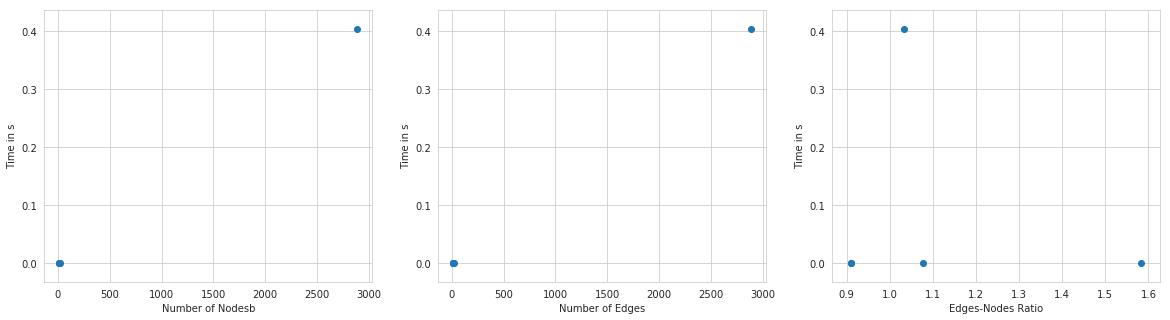

In [37]:
listNumberOfNodes = []
listNumberOfEdges = []
listRatio=[]
listRuntimes = []
for graph in listResults:
    listNumberOfNodes.append(graph['numberOfNodes'])
    listNumberOfEdges.append(graph['numberOfEdges'])
    listRatio.append(graph['numberOfEdges']/graph['numberOfNodes'])
    listRuntimes.append(graph['runtime'])

fig, axs = plt.subplots(1, 3, figsize=(20, 5), sharey=False)
axs[0].scatter(listNumberOfNodes, listRuntimes)
axs[1].scatter(listNumberOfNodes, listRuntimes)
axs[2].scatter(listRatio, listRuntimes)
axs[0].set_xlabel("Number of Nodesb")
axs[1].set_xlabel("Number of Edges")
axs[2].set_xlabel("Edges-Nodes Ratio")
axs[0].set_ylabel("Time in s")
axs[1].set_ylabel("Time in s")
axs[2].set_ylabel("Time in s")

plt.show()

# APPENDIX
## EXAMPLE 3:

Level 0 (STOP if CB=1):


Index i| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 |
---|---|---|---|---|---|---|---|---|---|---|---|---|---|
Laplacian(i,i)| 5 | 3 | 2 | 1 | 2 | 2 | 6 | 2 | 1 | 1 | 1 | 1 | 1 |

Diagonal of Laplacian of Level 1:

Index i| 0 | 1 | 2 | - | 3 | 4 | 5 | 6 | - | - | - | - | - |
 ---|---|---|---|---|---|---|---|---|---|---|---|---|---|
Laplacian(i,i)| 4 | 2 | 2 |   | 2 | 2 | 3 | 1 |   |   |   |   |   |

Diagonal of Laplacian of Level 2 (STOP if CB=2):

Index i| 0 | 1 | 2 | - | 3 | 4 | 5 | - | - | - | - | - | - |
---|---|---|---|---|---|---|---|---|---|---|---|---|---|
Laplacian(i,i)| 4 | 2 | 2 |   | 2 | 2 | 2 | - |   |   |   |   |   |